# Advanced Loops
### featuring: list / dictionary comprehension, enumerate, zip, nested loops for 2D arrays

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### List comprehension: a shortcut to creating a `list` using a `for` loop inside square brackets `[]`

#### While difficult to wrap your head around at first, this is actually a very common syntax to see in Python code.

* Format: `mylist = [expression for item in iterable]`

In [2]:
# a pointless example to warmup
number_list = [i for i in range(1, 6)]
print(number_list)

[1, 2, 3, 4, 5]


In [3]:
# here we do something with i
number_list = [i**2 for i in range(1, 6)]
print(number_list)

[1, 4, 9, 16, 25]


In [4]:
# we can add conditions
number_list = [i for i in range(1, 15) if i % 2 == 1]
print(number_list)

[1, 3, 5, 7, 9, 11, 13]


In [5]:
# the equivalent without comprehension takes longer...
number_list = []
for i in range(1, 15):
    if i % 2 == 1:
        number_list.append(i)
print(number_list)

[1, 3, 5, 7, 9, 11, 13]


In [6]:
# a more complicated example

# initial list
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

# a new list with shapes
shapes = ["round" if x != "banana" else "not round" for x in fruits] # note the for loop at end

# print results
print("fruits:",fruits)
print("shapes:",shapes)

fruits: ['apple', 'banana', 'cherry', 'kiwi', 'mango']
shapes: ['round', 'not round', 'round', 'round', 'round']


In [7]:
# this is equivalent but tedious

# initial list
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

# make shapes
shapes = []
for x in fruits:
    if x !="banana":
        shapes.append("round")
    else:
        shapes.append("not round")
        
# print results
print("fruits:",fruits)
print("shapes:",shapes)

fruits: ['apple', 'banana', 'cherry', 'kiwi', 'mango']
shapes: ['round', 'not round', 'round', 'round', 'round']


### You can also create dictionaries with comprehension

In [8]:
# key = i, value = i**2
squares = {i: i**2 for i in range(1, 16)}
print(squares)

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81, 10: 100, 11: 121, 12: 144, 13: 169, 14: 196, 15: 225}


In [9]:
# key = "key=i", value = i**2
squares = {"key={:02d}".format(i): i**2 for i in range(1, 16)}
print(squares)

{'key=01': 1, 'key=02': 4, 'key=03': 9, 'key=04': 16, 'key=05': 25, 'key=06': 36, 'key=07': 49, 'key=08': 64, 'key=09': 81, 'key=10': 100, 'key=11': 121, 'key=12': 144, 'key=13': 169, 'key=14': 196, 'key=15': 225}


### recall `enumerate()` - allows you to loop over index and value simultaneously

In [10]:
# a very common use case
x = [1.2, 6.3, 5.1, 3.4]
for i, val in enumerate(x):
    print(i, val)

0 1.2
1 6.3
2 5.1
3 3.4


In [11]:
# this is equivalent but takes more work
x = [1.2, 6.3, 5.1, 3.4]
i = 0
for val in x:
    print(i, val)
    i+=1

0 1.2
1 6.3
2 5.1
3 3.4


### recall `zip()` - packs together two lists or arrays for easy iteration

In [12]:
# "zips" the two list so we unpack as a tuple
x = [1.2, 6.3, 5.1, 3.4]
y = [4, 5, 2, 6]
for xi, yi in zip(x, y):
    print(xi, yi)

1.2 4
6.3 5
5.1 2
3.4 6


In [13]:
# What if lists or arrays are of different lengths?
x = [1.2, 6.3, 5.1, 3.4]
y = [4, 5, 2, 6, 8, 10, 20, 5]
for xa, ya in zip(x, y):
    print(xa, ya)

1.2 4
6.3 5
5.1 2
3.4 6


In [14]:
# We can use zip for more than 2 sequences
x = [1.2, 6.3, 5.1, 3.4]
y = [4, 5, 2, 6]
z = ['cat','dog','mouse']
for xa, ya, za in zip(x, y, z):
    print(xa, ya, za)

1.2 4 cat
6.3 5 dog
5.1 2 mouse


### You can combine `enumerate` and `zip`

In [15]:
# here, enumerate gives an index and a tuple
for i, (xa, ya) in enumerate(zip(x, y)):
    print(i, xa, ya)

0 1.2 4
1 6.3 5
2 5.1 2
3 3.4 6


## Example: Analyzing and Visualizing Multidimensional Arrays

### Load data and plot
* `lecture12_grid.txt` contains data from a marine seismic experiment. The 3 columns are x (distance), z (depth), and v (velocity of seismic waves).
* `lecture12_interface1.txt` and `lecture12_interface2.txt` contain x,z values (two columns) that mark interfaces (boundaries) between geologic layers.

In [16]:
### Load data and unpack into arrays
x, z, v = np.loadtxt('lecture12_grid.txt', unpack=True)
x1, z1 = np.loadtxt('lecture12_interface1.txt', unpack=True)
x2, z2 = np.loadtxt('lecture12_interface2.txt', unpack=True)

`plt.scatter(x, y, size, color,...)`

Scatter plots are useful to plot markers with different sizes and colors.
* `x` and `y` give the positions of each marker in the plot
* `size` (optional) is either a number or an array (of the same size as `x` and `y`) specifying marker size
* `color` (optional) is either a color or an array (of the same size as `x` and `y`) specifying marker color

For `color` arrays, we can map numerical values to actual colors using a colormap (https://matplotlib.org/stable/tutorials/colors/colormaps.html).

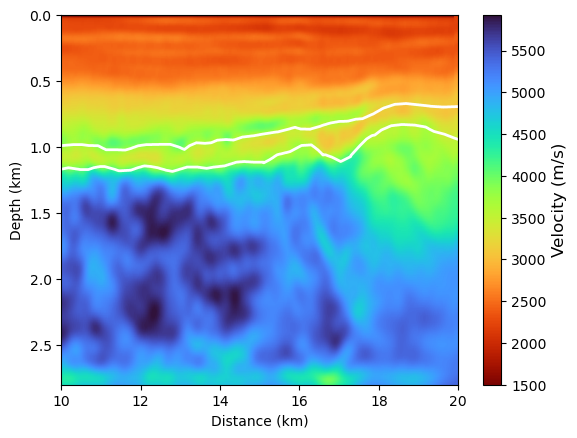

In [17]:
### Plot data

# plot data - note all are 1D arrays...
plt.scatter(x, z, c=v, cmap='turbo_r') # x,z,v grid
plt.plot(x1, z1, 'w', linewidth=2) # interface 1
plt.plot(x2, z2, 'w', linewidth=2) # interface 2

# set the plot limits
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(z), np.max(z)])
plt.gca().invert_yaxis(); # depth from surface

# format plot
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')

# add a colorbar
cb = plt.colorbar()
cb.set_label('Velocity (m/s)', fontsize=12);

#### Since this is gridded data, we can use `reshape` to convert the velocity values to a 2D array

In [18]:
# inspect the data grid
xa = np.unique(x) # x points in the grid
za = np.unique(z) # z points in the grid
print(len(x), len(xa)) # 801 x 225 = 180225
print(len(z), len(za)) # 801 x 225 = 180225

180225 801
180225 225


In [19]:
# reshape the data grid
nx = len(xa)
nz = len(za)
va = np.reshape(v, (nx, nz)).T # reshape as a 2D grid, then flip so in (z,x) coords.
print(va.shape)

(225, 801)


### Calculate average velocity between the 2 interfaces and in the 500 m below the 2nd interface.

The layer between the interfaces is called a resurge deposit and formed in the aftermath of a meteor impact.

In [20]:
# first, obtain grid spacing
dz = za[1] - za[0] # z-grid spacing in km
i500 = int(np.round(0.5 / dz)) # points per 500m (0.5km)
print(dz, i500)

0.0125 40


In [21]:
print(za[:5]) # good to check this is indeed evenly spaced

[0.     0.0125 0.025  0.0375 0.05  ]


In [22]:
### Compute average velocities in two layers

# arrays to store these velocities for each x position
vmean_resurge = np.zeros(nx)
vmean_below = np.zeros(nx)

# loop over the depth values (z) corresponding to each x-position [indexed by j]
for j, (z1a, z2a) in enumerate(zip(z1, z2)):
    i1 = int(np.round(z1a / dz)) # Calculate the row corresponding to z1 interface
    i2 = int(np.round(z2a / dz)) # Calculate the row corresponding to z2 interface
    vmean_resurge[j] = np.mean(va[i1:i2+1, j]) # Mean the velocity btwn z1 and z2
    vmean_below[j] = np.mean(va[i2:i2+i500+1, j]) # Mean velocity btwn z2 and z2+500

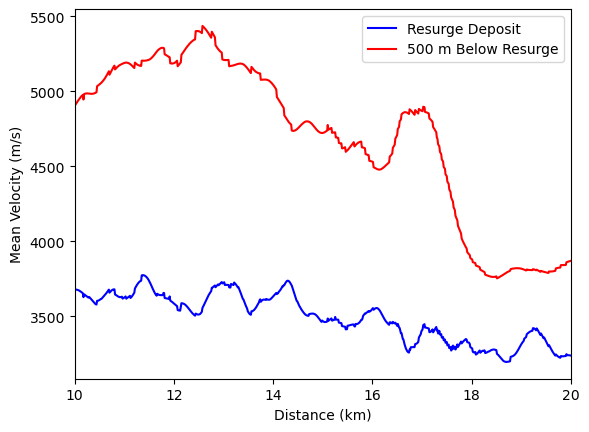

In [23]:
### Plot results

# plot data
plt.plot(xa, vmean_resurge, '-b', label='Resurge Deposit')
plt.plot(xa, vmean_below, '-r', label='500 m Below Resurge')
plt.xlim([np.min(xa),np.max(xa)])

# format plot
plt.xlabel('Distance (km)')
plt.ylabel('Mean Velocity (m/s)')
plt.legend(loc='best');

Velocities in the resurge deposit (blue) between the two interfaces are lower and less variable than the velocities in the 500 m below the resurge deposit (red). The low velocities seen in the red curve at distances 18-20 km are related to the peak ring of an impact crater imaged by this experiment, which is made of fractured granite.

### Using nested loops

#### Find x,z values where velocity > 5900 m/s

In [24]:
# A simple example, finding high values of velocity
xhigh = []
zhigh = []
vhigh = []
for i in range(nz):
    for j in range(nx):
        if va[i, j] > 5900:
            xhigh.append(xa[j])
            zhigh.append(za[i])
            vhigh.append(va[i, j])
print('There are', len(vhigh), 'values > 5900 m/s')

There are 80 values > 5900 m/s


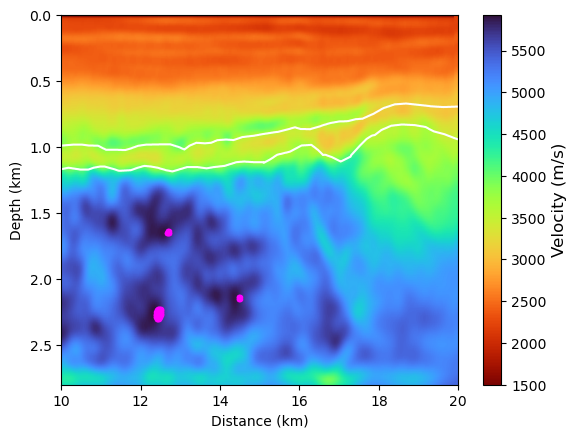

In [25]:
### Plot these high values

# plot data
plt.scatter(x, z, c=v, cmap='turbo_r')
plt.plot(x1, z1, 'w')
plt.plot(x2, z2, 'w')
plt.plot(xhigh, zhigh, '.', color="fuchsia") # mark the high values

# set the plot limits
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(z), np.max(z)])
plt.gca().invert_yaxis(); # depth from surface

# format plot
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')

# add a colorbar
cb = plt.colorbar();
cb.set_label('Velocity (m/s)', fontsize=12)

### An alternative: logical indexing and `meshgrid`

Rather than using flat 1D arrays in our plot, we can use 2D arrays and arrive at the same answer.

In [26]:
# find all positions in the 2D array
ihigh = va > 5900
print('There are', np.sum(ihigh), 'values > 5900 m/s in a grid of shape:', ihigh.shape)

There are 80 values > 5900 m/s in a grid of shape: (225, 801)


In [27]:
# create a 2D grid of x and z values
xp, zp = np.meshgrid(xa, za) # recall xa and za are the unique grid points in x and z
print("\nx-grid:", xp.shape)
print(xp)
print("\nz-grid:", zp.shape)
print(zp)


x-grid: (225, 801)
[[10.    10.013 10.025 ... 19.975 19.988 20.   ]
 [10.    10.013 10.025 ... 19.975 19.988 20.   ]
 [10.    10.013 10.025 ... 19.975 19.988 20.   ]
 ...
 [10.    10.013 10.025 ... 19.975 19.988 20.   ]
 [10.    10.013 10.025 ... 19.975 19.988 20.   ]
 [10.    10.013 10.025 ... 19.975 19.988 20.   ]]

z-grid: (225, 801)
[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.0125 0.0125 0.0125 ... 0.0125 0.0125 0.0125]
 [0.025  0.025  0.025  ... 0.025  0.025  0.025 ]
 ...
 [2.775  2.775  2.775  ... 2.775  2.775  2.775 ]
 [2.7875 2.7875 2.7875 ... 2.7875 2.7875 2.7875]
 [2.8    2.8    2.8    ... 2.8    2.8    2.8   ]]


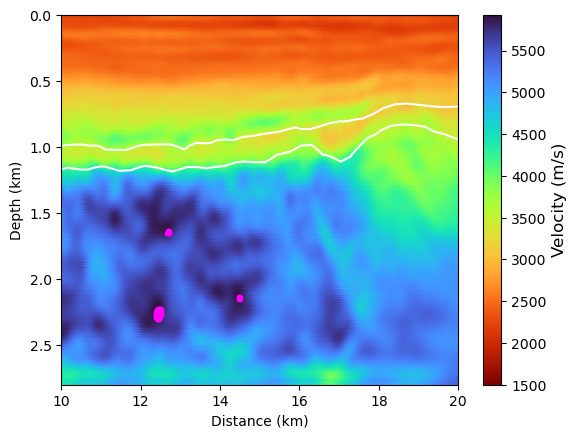

In [28]:
### Plot these gridded values

# plot data
plt.scatter(xp, zp, c=va, cmap='turbo_r')
plt.plot(x1, z1,'w')
plt.plot(x2, z2,'w')
plt.plot(xp[ihigh], zp[ihigh], '.', color="fuchsia") # mark the high values

# set the plot limits
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(z), np.max(z)])
plt.gca().invert_yaxis(); # depth from surface

# format plot
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')

# add a colorbar
cb = plt.colorbar();
cb.set_label('Velocity (m/s)', fontsize=12)


# Summary
* list comprehension allows for a shorter syntax for simple loops
* comprehension can be used with other objects such as dictionaries
* `enumerate` and `zip` can also be used to simplify loops
* nested for loops can be used to traverse multidimensional arrays
* sometimes we can accomplish the same thing more quickly with clever indexing
* `meshgrid` can be used to create 2D grids for easy plotting
* these tricks are useful when analyzing and plotting 2D/3D/4D data